In [ ]:
!pip install spacy
!pip install newsapi-python
!python -m spacy download en_core_web_lg
!pip3 install pytz



articlesCOVID_2022-03-28.pckl
['lot', 'ways', 'listen', 'daily', 'heres', 'want', 'hear', 'tune', 'tell', 'think', 'email', 'thedaily@nytimes.com', 'follow', 'michael', 'barbaro', 'twitter', '@mikieb', 'chars']
['ruling', 'instances', 'abuse', 'children', 'reported', 'authorities', 'handled', 'haredi', 'community', 'depart', 'chars']
['mr', 'adams', 'democrat', 'conversations', 'citys', 'business', 'leaders', 'including', 'david', 'solomon', 'executive', 'banking', 'firm', 'goldman', 'sachs', 'jonathan', '+1705', 'chars']
['man', 'receiving', 'booster', 'coronavirus', 'vaccine', 'tel', 'aviv', 'moderna', 'cited', 'data', 'israel', 'request.credit', 'amir', 'cohen', 'reuters', 'moderna', 'said', 'thursday', 'asked', '+3031', 'chars']
['months', 'omicron', 'variant', 'drove', 'coronavirus', 'case', 'numbers', 'heights', 'united', 'states', 'scientists', 'health', 'officials', 'bracing', 'swell', 'pandemic', '+10570', 'chars']
['dr', 'jha', 'born', 'bihar', 'state', 'india', 'country', 'p

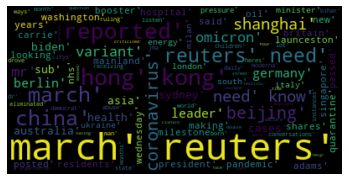

In [33]:
# Code based on homework's provided tutorial: 
#   https://medium.com/analytics-vidhya/extracting-keywords-from-covid-19-news-with-python-13249571d37b
import spacy
import en_core_web_lg
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from newsapi.newsapi_client import NewsApiClient
from datetime import date, timedelta
from wordcloud import WordCloud
from collections import Counter
from string import punctuation

 
# Automatically get the correct date range
today_date = date.today()
# The API will not accept 30 days exactly, so I am looking at the last 28 days
#   Error example:
#   "Your plan permits you to request articles as far back as 2022-02-27, but 
#   you have requested 2022-02-27. You may need to upgrade to a paid plan."
article_date_min = today_date - timedelta(28)

# YYYY-MM-DD
today_date = today_date.strftime("%Y-%m-%d")
article_date_min = article_date_min.strftime("%Y-%m-%d")
#print("today =", today_date)
#print("last month =", article_date_min)

# Guide's Code
nlp = en_core_web_lg.load()
newsapi = NewsApiClient(api_key='feaee85415714d7d9221964aedc57525')

def getMonthArticles(x):
  # Guide's Code, with changes
  temp = newsapi.get_everything(q='coronavirus', language='en', 
                                from_param=article_date_min, to=today_date,
                                sort_by='relevancy', page=x)
  return temp

# Guide's Code, with changes
filename = 'articlesCOVID_' + today_date + '.pckl'
print (filename)
pickle.dump(articles, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/' + filename
pickle.dump(loaded_model, open(filepath, 'wb'))

articles = list(map(getMonthArticles, range(1, 6)))
#print(articles)
dados = []

# Guide's Code
for i, article in enumerate(articles):
  for x in article['articles']:
    title = x['title']
    description = x['description']
    content = x['content']
    dados.append({'title': title, 'desc': description, 'content': content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

results = []

def get_keywords_eng(text):
  result = []
  word_type = ['PROPN', 'VERB', 'NOUN']
  article = nlp(text.lower())
  for token in article:
    # Guide's Code
    if (token.text in nlp.Defaults.stop_words or token.text in punctuation):
      continue
    if (token.pos_ in word_type):
      result.append(token.text)
  print(result)
  return result

# Guide's Code
for content in df.content.values:
  results.append([('#' + x[0]) for x in 
                  Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

# Guide's Code
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()